<h1>Final Assignment: Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph. 
PS: Using this lab document to submit the assessment due to IBM Trial expiry.


## Question 1: Extracting Tesla Stock Data Using yfinance


We can use the Ticker function to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
import yfinance as yf
import pandas as pd

#Defining the ticker symbol for Tesla
#ticker_symbol = 'TSLA'
#Using yfinance to download the historical stock data
#tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)

tesla = yf.Ticker("TSLA")

#Set the period parameter to max so we get information for the maximum amount of time.
tesla_data = tesla.history(period="max")

#Print the first few rows of the data
#Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function.
tesla_data.reset_index(inplace=True)
tesla_data.head()

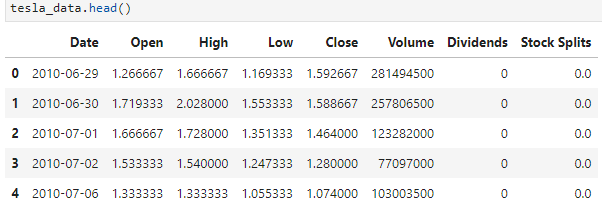

## Question 2: Use Webscraping to Extract Tesla Revenue Data

Let's use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. 
Save the text of the response as a variable named html_data.

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

Parsing the html data using beautiful_soup.

In [ ]:
soup = BeautifulSoup(html_data,'html.parser')

Using BeautifulSoup or the read_html function ot extract the table with Tesla Quarterly Revenue and store it into tesla_revenue.


In [ ]:
tesla_revenue=pd.read_html(url, match = "Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue.head()

To remove the comma and dollar sign from the Revenu column:

In [ ]:
tesla_revenue = tesla_revenue.rename(columns={"Tesla Quarterly Revenue(Millions of US $)":"Date","Tesla Quarterly Revenue(Millions of US $).1":"Revenue"}) 

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

tesla_revenue.head()

To remove an null or empty strings in the Revenue column:

In [16]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Displaying the last rows of the tesla_revenue dataframe using the tail function. 

In [ ]:
tesla_revenue.tail()

## Question 3: Extracting GameStop Stock Data Using yfinance


We can use the Ticker function to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is GME.

In [ ]:
import yfinance as yf
import pandas as pd

#Defining the ticker symbol for Game Stop
#ticker_symbol = 'GME'
#Using yfinance to download the historical stock data
#game_stop_data = yf.download(ticker_symbol, start=start_date, end=end_date)

game_stop = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [ ]:
#Set the period parameter to max so we get information for the maximum amount of time.
gme_data = game_stop.history(period="max")

Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function.

In [ ]:
#Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function.

gme_data.reset_index(inplace=True)
gme_data.head()

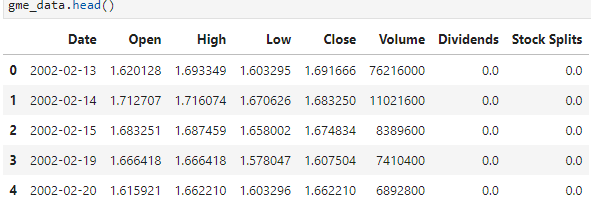

## Question 4: Extracting GameStop Revenue Data Using Webscraping


Let's use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

Parsing the html data using beautiful_soup.

In [ ]:
soup = BeautifulSoup(html_data,'html.parser')

Using BeautifulSoup or the read_html function to extract GameStop's Revenue and store it into gme_revenue.
Also, removing comma, dollar sign from Revenue column.

In [ ]:
gme_revenue=pd.read_html(url,match="GameStop Quarterly Revenue", flavor='bs4')[0]

gme_revenue = gme_revenue.rename(columns={"GameStop Quarterly Revenue(Millions of US $)":"Date","GameStop Quarterly Revenue(Millions of US $).1":"Revenue"}) 
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.head()

Removing Null or empty strings from the Revenue column and display the last rows of the gme_revenue dataframe using the tail function.

In [16]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

## Question 5: Tesla Stock and Revenue Dashboard


Using the 'make_graph' function graphs the Tesla Stock Data.

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Dashboard')

## Question 6: GameStop Stock and Revenue Dashboard


Using the 'make_graph' function graphs the GameStop Stock Data.

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop Stock and Revenue Dashboard')

Unable to load the graph due to Https 404 Error. This is probably due to changes in the structure of the Yahoo Finance website or a temporary issue with the server.